#### Reference :
##### Plan a Moon mission by using Python pandas
##### https://docs.microsoft.com/en-us/training/modules/plan-moon-mission-using-python-pandas/

In [1]:
# download & install :
# pipenv 
# jupyter (pipenv)
# pandas (pipenv)
# seaborn (pip)

## گام یکم : تبدیل داده ها به دیتا فریم 

In [2]:
# data:
# NASA   ---> https://curator.jsc.nasa.gov/lunar/samplecatalog/index.cfm
# git
# kaggle

In [3]:
import pandas as pd

In [4]:
samples = pd.read_csv('data/rocksamples.csv')
#samples.info()

## گام دوم : پاکسازی داده ها 

#### فرآیند پاکسازی داده ها 
##### 1 . تماشای داده ها 
##### 2 . برخورد با فقدان داده  ( یا داده های تکراری ) 
##### 3 . نرمال سازی نوع داده ها 
##### 4 . استاندارد کردن داده ها 
##### 5 . یکسان سازی و تصحیح نام ستون ها 
##### 6 . برخورد با داده های پرت و اشتباه 
##### 7 . مشورت با متخصص و ذخیره داده های پاکیزه 

In [5]:
# مرحله اول : تماشای داده ها - توصیف 


In [6]:
samples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2229 entries, 0 to 2228
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            2229 non-null   int64  
 1   Mission       2229 non-null   object 
 2   Type          2229 non-null   object 
 3   Subtype       2226 non-null   object 
 4   Weight (g)    2229 non-null   float64
 5   Pristine (%)  2229 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 104.6+ KB


In [7]:
samples.head(10)

ID   Mission     Type   Subtype  Weight (g)  Pristine (%)
0  10001  Apollo11     Soil  Unsieved       125.8         88.36
1  10002  Apollo11     Soil  Unsieved      5629.0         93.73
2  10003  Apollo11   Basalt  Ilmenite       213.0         65.56
3  10004  Apollo11     Core  Unsieved        44.8         71.76
4  10005  Apollo11     Core  Unsieved        53.4         40.31
5  10008  Apollo11     Soil  Unsieved        89.0          5.75
6  10009  Apollo11  Breccia  Regolith       112.0         97.27
7  10010  Apollo11     Soil  Unsieved       491.0         91.03
8  10011  Apollo11     Soil  Unsieved        82.6         62.01
9  10014  Apollo11     Soil  Unsieved        50.0          0.00

In [8]:
samples.tail()

ID   Mission     Type   Subtype  Weight (g)  Pristine (%)
2224  79528  Apollo17  Breccia  Regolith        2.38         100.0
2225  79529  Apollo17  Breccia  Regolith        1.84         100.0
2226  79535  Apollo17  Breccia  Regolith        1.69         100.0
2227  79536  Apollo17  Breccia  Regolith        1.66         100.0
2228  79537  Apollo17  Breccia  Regolith        1.05         100.0

In [9]:
samples.describe()

ID    Weight (g)  Pristine (%)
count   2229.000000   2229.000000   2229.000000
mean   52058.432032    168.253024     84.512764
std    26207.651471    637.286458     22.057299
min    10001.000000      0.000000      0.000000
25%    15437.000000      3.000000     80.010000
50%    65527.000000     10.200000     92.300000
75%    72142.000000     93.490000     98.140000
max    79537.000000  11729.000000    180.000000

In [10]:
# مرحله اول : تماشای داده ها - نمودار  

In [11]:
# بر پایه متپلات لایب

In [12]:
import matplotlib.pyplot as plt

In [13]:
fig, ax = plt.subplots()   # ---> شکل حاوی نمودار 
ax.scatter(samples['Mission'], samples['Weight (g)'])
ax.set_xlabel('Mission')
ax.set_ylabel('Weight (g)')
plt.show()

In [14]:
# بر پایه ای.پی.آی پانداس 

In [15]:
samples.plot(kind= 'scatter', x= 'Mission', y= 'Weight (g)')

<AxesSubplot:xlabel='Mission', ylabel='Weight (g)'>

<AxesSubplot:xlabel='Pristine (%)', ylabel='Weight (g)'>

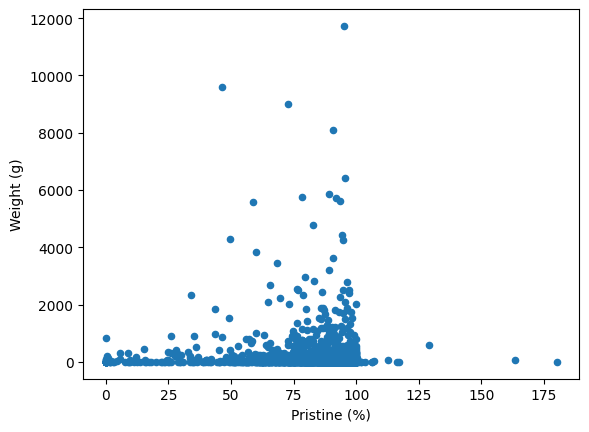

In [16]:
samples.plot(kind= 'scatter', x= 'Pristine (%)', y= 'Weight (g)')

In [17]:
# پیش از مرحله بعدی یک کپی از دیتا فریم می گیریم 
samples_m = samples.copy()

In [18]:
# مرحله دوم : برخورد با داده های تهی و سطرهای تکراری  

In [19]:
# جایگزینی سلول های تهی با یک مقدار معین 

In [20]:
#samples_m.fillna(0, inplace= True)
#samples_m['Type'].fillna(0, inplace= True)
#samples_m['Weight (g)'].fillna(0, inplace= True)

In [21]:
# 1. 
# Mean میانگین 
# 2, 3, 4 
# 2 + 3 + 4 = 9
# mean = 9 / 3 = 3

In [22]:
# 2.
# Median میانه 
# 4, 2, 8, 1, 15
# ---> 1, 2, 4, 8, 15
# median = 4

# *** #

# 2, 4, 5, 5, 4, 5
#  ---> 2, 4, 4, 5, 5, 5
# median = 4.5 

In [23]:
# 3. 
# Mode نما 
# 2, 4, 5, 5, 4, 5
# ---> 2, 4, 4, 5, 5, 5
# mode = 5

In [24]:
mean = samples_m['Weight (g)'].mean()
median = samples_m['Weight (g)'].median()
mode = samples_m['Weight (g)'].mode()[0]
samples_m['Weight (g)'].fillna(mean, inplace= True)   # or use 'median'/'mode'

In [25]:
# حذف سطرهای حاوی حتا یک سلول تهی

In [26]:
# samples_m = samples.dropna()   # ---> خروجی دیتا فریم است 
samples_m.dropna(inplace= True)   # ---> همین دیتا فریم را با مقدارهای تازه بازنویسی کن ، تغییرات روی همین دیتا فریم است و خروجی ندارد 
# da = samples_m.dropna(inplace= True)   # ---> none type خروجی دیتا فریم نیست 

In [27]:
# حذف سطرهای تکراری 

In [28]:
print(samples_m.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
2224    False
2225    False
2226    False
2227    False
2228    False
Length: 2226, dtype: bool


In [29]:
samples_m.drop_duplicates(inplace= True)   # ---> در همین دیتا فریم تغییرات را بازنویسی کن 

In [30]:
samples_m.info()   # ---> ایندکس ها معادل ند 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2226 entries, 0 to 2228
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            2226 non-null   int64  
 1   Mission       2226 non-null   object 
 2   Type          2226 non-null   object 
 3   Subtype       2226 non-null   object 
 4   Weight (g)    2226 non-null   float64
 5   Pristine (%)  2226 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 121.7+ KB


In [31]:
# مرحله سوم و چهارم : مناسب کردن داده ها برای تحلیل های بعدی 

In [32]:
samples_m['Weight (g)'] = samples_m['Weight (g)'].apply(lambda x : x * 0.001)   # ---> تابع تک خطی 
# حتا می توانیم خود تابع را تعریف و تولید کنیم 

In [33]:
samples_m.head()

ID   Mission    Type   Subtype  Weight (g)  Pristine (%)
0  10001  Apollo11    Soil  Unsieved      0.1258         88.36
1  10002  Apollo11    Soil  Unsieved      5.6290         93.73
2  10003  Apollo11  Basalt  Ilmenite      0.2130         65.56
3  10004  Apollo11    Core  Unsieved      0.0448         71.76
4  10005  Apollo11    Core  Unsieved      0.0534         40.31

In [34]:
# اصلاح عنوان سر ستون ها 

In [35]:
samples_m.rename(columns= {'Weight (g)': 'Weight (kg)'}, inplace= True)   # ---> search : rename + column + pandas 
# inplace ---> مستقیم تغییرات را در همین دیتا فریم اعمال می کند 

In [36]:
samples_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2226 entries, 0 to 2228
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            2226 non-null   int64  
 1   Mission       2226 non-null   object 
 2   Type          2226 non-null   object 
 3   Subtype       2226 non-null   object 
 4   Weight (kg)   2226 non-null   float64
 5   Pristine (%)  2226 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 121.7+ KB


In [37]:
 # مرحله ششم : داده های پرت - تشخیص 

In [38]:
# نمودار جعبه ایی 

# 0, 5.6, 8.7, 14.1, 14.1, 15, 17.2, 19.2, 19.3, 24.1, 24.7
# Q1 ---> 8.7   Q2 ---> 15   Q3 ---> 19.3
# IQR = Q3 - Q1 ---> 19.3 - 8.7 = 10.6
# outliers (min) ---> Q1 - 1.5 * IQR
# outliers (max) ---> Q3 + 1.5 * IQR

In [39]:
import seaborn as sb   # ---> ای.پی.آی خوبی برای نمودارهای آماری دارد ، از باکس پلات پانداس هم می توان استفاده کرد 

<AxesSubplot:xlabel='Pristine (%)'>

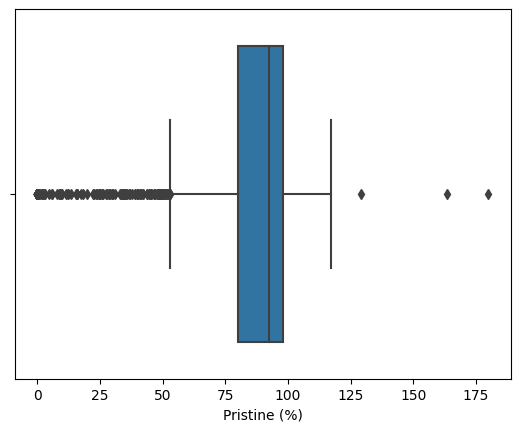

In [40]:
sb.boxplot(x= samples_m['Pristine (%)'])

<AxesSubplot:xlabel='Weight (kg)'>

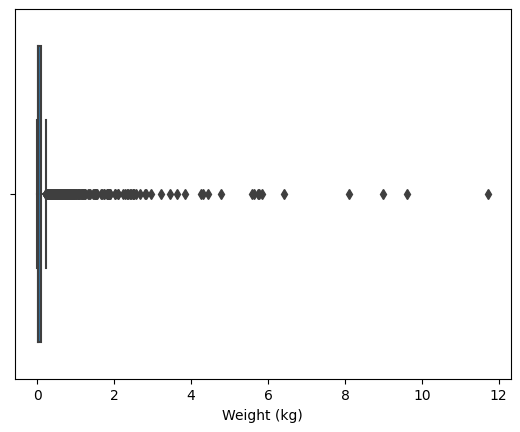

In [41]:
sb.boxplot(x= samples_m['Weight (kg)'])

In [42]:
# مرحله ششم : داده های پرت - برخورد 

In [43]:
# interquartile range    iqr method 

q1_w = samples_m['Weight (kg)'].quantile(0.25)
q3_w = samples_m['Weight (kg)'].quantile(0.75)
iq_w = q3_w - q1_w   # ---> 93.490000 g - 3.000000 g   دسکرایب داده های خام 
print(iq_w)

0.09036250000000001


In [44]:
# حذف داده های پرت وزن 

In [45]:
# قصد نداریم داده های وزنی را حذف کنیم 

# for i in samples_m.index:
#     if samples_m.loc[i, 'Weight (kg)'] > (q3_w + (1.5 * iq_w)):   # ---> لوکیشن - مختصات 
      #if samples_m.loc[i, 'Weight (kg)'] > (q3_w + (1.5 * iq_w)) or (q1_w - (1.5 * iq_w)):
#         samples_m.drop(i, inplace= True)   # ---> حذف در پانداس : دراپ 

In [46]:
# حذف داده های پرت درصد تازگی 

In [47]:
for i in samples_m.index:
    if samples_m.loc[i , 'Pristine (%)'] > 100:
        samples_m.drop(i, inplace= True)

In [48]:
samples_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2208 entries, 0 to 2228
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            2208 non-null   int64  
 1   Mission       2208 non-null   object 
 2   Type          2208 non-null   object 
 3   Subtype       2208 non-null   object 
 4   Weight (kg)   2208 non-null   float64
 5   Pristine (%)  2208 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 185.3+ KB


#### تمرین :
##### موازی با باکس پلات و آی.کیوآر 
##### در مورد دو مفهوم زد اسکور و اسکیوونس ( نمره استاندارد - چولگی ) مطالعه کنید 
##### سپس نحوه حذف داده های پرت بر پایه این دو شاخص را در کد خود 
##### پیاده و نتایج را مقایسه کنید  

## گام سوم : تحلیل داده ها 

In [49]:
# ایجاد یک دیتا فریم با ساختار تازه برای واریز نتایج تحلیل 

In [50]:
missions = pd.DataFrame()   # ---> new df
missions

Empty DataFrame
Columns: []
Index: []

In [51]:
# استخراج دسته ها از ستون 

In [52]:
missions['Mission'] = samples_m['Mission'].unique()   # ---> تحلیل و بررسی یونیک ها (یکتاها) 

In [53]:
missions

Mission
0  Apollo11
1  Apollo12
2  Apollo14
3  Apollo15
4  Apollo16
5  Apollo17

In [54]:
missions.head()

Mission
0  Apollo11
1  Apollo12
2  Apollo14
3  Apollo15
4  Apollo16

In [55]:
# جمع داده های یک ستون براساس گروه داده های آن 

In [56]:
total_samples_weight = samples_m.groupby('Mission')['Weight (kg)'].sum()
# این یک سریز است ، دیتا فریم نیست ، ستون میشن به عنوان ایندکس ها هستند ، یک سریز ساخته می شود 
# ایندکس ها در سریز و دیتا فریم ها می تواند دلخواه باشد 
# دسته بندی میشن به عنوان ایندکس انتخاب می شود 

In [57]:
total_samples_weight

Mission
Apollo11     21.49408
Apollo12     31.82968
Apollo14     41.24569
Apollo15     74.95400
Apollo16     92.46112
Apollo17    109.31729
Name: Weight (kg), dtype: float64

In [58]:
# ادغام یک سری در یک دیتا فریم 

In [59]:
missions = pd.merge(missions, total_samples_weight, on= 'Mission')

# به جای مرج از متد دیگری در داکیومنتیشن پانداس هم می توان استفاده کرد 
# برای اینکه خروجی مرج را در همین دیتا فریم داشته باشیم ، نامش را یکسان انتخاب می کنیم 
# آن یعنی لولا ، روی چی قراره که این مرج اتفاق بیافته 
# روی ستون میشن حلقه فور میزنه 
# به ازای هر میشن ، میره سراغ سریز که پارامتر دوم مرج است 
# اگر میشن را در سریز پیدا کرد ، داده آن سری را در ستون جدید واریز می کند 
# خروجی آن یک دیتا فریم جدید است که آن را در همان میشنز می ریزیم 
# یعنی میشنز را بازنویسی می کنیم 

In [60]:
missions   # ---> سر ستون را از ستون دیتا می گیرد 

Mission  Weight (kg)
0  Apollo11     21.49408
1  Apollo12     31.82968
2  Apollo14     41.24569
3  Apollo15     74.95400
4  Apollo16     92.46112
5  Apollo17    109.31729

In [61]:
missions.rename(columns= {'Weight (kg)': 'Total weight of Samples (kg)'}, inplace= True)

In [62]:
missions

Mission  Total weight of Samples (kg)
0  Apollo11                      21.49408
1  Apollo12                      31.82968
2  Apollo14                      41.24569
3  Apollo15                      74.95400
4  Apollo16                      92.46112
5  Apollo17                     109.31729

In [63]:
# تفاضل داده ها در یک ستون 

In [64]:
missions['Weight Diff'] = missions['Total weight of Samples (kg)'].diff()   # ---> تفاضل هر سطر با سطر قبلی 

In [65]:
missions

Mission  Total weight of Samples (kg)  Weight Diff
0  Apollo11                      21.49408          NaN
1  Apollo12                      31.82968     10.33560
2  Apollo14                      41.24569      9.41601
3  Apollo15                      74.95400     33.70831
4  Apollo16                      92.46112     17.50712
5  Apollo17                     109.31729     16.85617

In [66]:
missions['Weight Diff'] = missions['Weight Diff'].fillna(value= 0)

In [67]:
missions

Mission  Total weight of Samples (kg)  Weight Diff
0  Apollo11                      21.49408      0.00000
1  Apollo12                      31.82968     10.33560
2  Apollo14                      41.24569      9.41601
3  Apollo15                      74.95400     33.70831
4  Apollo16                      92.46112     17.50712
5  Apollo17                     109.31729     16.85617

In [68]:
missions.rename(columns= {'Total weight of Samples (kg)': 'Samples Weight (kg)'}, inplace= True)   # ---> نام ستون خلاصه مختصر مفید 

In [69]:
missions

Mission  Samples Weight (kg)  Weight Diff
0  Apollo11             21.49408      0.00000
1  Apollo12             31.82968     10.33560
2  Apollo14             41.24569      9.41601
3  Apollo15             74.95400     33.70831
4  Apollo16             92.46112     17.50712
5  Apollo17            109.31729     16.85617

In [70]:
# افزودن ستون (سری) به دیتافریم موجود 

In [71]:
# data ---> https://nssdc.gsfc.nasa.gov/nmc/SpacecraftQuery.jsp

In [72]:
missions['Lunar Module (LM)'] = ['Eagle (LM-5)', 'Intrepid (LM-6)', 'Antares (LM-8)',
'Falcon (LM-10)', 'Orion (LM-11)', 'Challenger (LM-12)']

# eagle ---> apollo 11, . . . 
# تبدیل داده های لیست به سریز 
# و به صورت یک ستون به دیتافریم اضافه کنیم  

In [73]:
missions

Mission  Samples Weight (kg)  Weight Diff   Lunar Module (LM)
0  Apollo11             21.49408      0.00000        Eagle (LM-5)
1  Apollo12             31.82968     10.33560     Intrepid (LM-6)
2  Apollo14             41.24569      9.41601      Antares (LM-8)
3  Apollo15             74.95400     33.70831      Falcon (LM-10)
4  Apollo16             92.46112     17.50712       Orion (LM-11)
5  Apollo17            109.31729     16.85617  Challenger (LM-12)

In [74]:
missions['LM Mass (kg)'] = [15103, 15235, 15264, 16430, 16445, 16456]

# 15103 ---> apollo 11, eagle 
# 15235 ---> apollo 12, intrepid

In [75]:
missions

Mission  Samples Weight (kg)  Weight Diff   Lunar Module (LM)  \
0  Apollo11             21.49408      0.00000        Eagle (LM-5)   
1  Apollo12             31.82968     10.33560     Intrepid (LM-6)   
2  Apollo14             41.24569      9.41601      Antares (LM-8)   
3  Apollo15             74.95400     33.70831      Falcon (LM-10)   
4  Apollo16             92.46112     17.50712       Orion (LM-11)   
5  Apollo17            109.31729     16.85617  Challenger (LM-12)   

   LM Mass (kg)  
0         15103  
1         15235  
2         15264  
3         16430  
4         16445  
5         16456

In [76]:
missions['LM Mass Diff'] = missions['LM Mass (kg)'].diff()

In [77]:
missions

Mission  Samples Weight (kg)  Weight Diff   Lunar Module (LM)  \
0  Apollo11             21.49408      0.00000        Eagle (LM-5)   
1  Apollo12             31.82968     10.33560     Intrepid (LM-6)   
2  Apollo14             41.24569      9.41601      Antares (LM-8)   
3  Apollo15             74.95400     33.70831      Falcon (LM-10)   
4  Apollo16             92.46112     17.50712       Orion (LM-11)   
5  Apollo17            109.31729     16.85617  Challenger (LM-12)   

   LM Mass (kg)  LM Mass Diff  
0         15103           NaN  
1         15235         132.0  
2         15264          29.0  
3         16430        1166.0  
4         16445          15.0  
5         16456          11.0

In [78]:
missions['LM Mass Diff'] = missions['LM Mass Diff'].fillna(value= 0)

In [79]:
missions

Mission  Samples Weight (kg)  Weight Diff   Lunar Module (LM)  \
0  Apollo11             21.49408      0.00000        Eagle (LM-5)   
1  Apollo12             31.82968     10.33560     Intrepid (LM-6)   
2  Apollo14             41.24569      9.41601      Antares (LM-8)   
3  Apollo15             74.95400     33.70831      Falcon (LM-10)   
4  Apollo16             92.46112     17.50712       Orion (LM-11)   
5  Apollo17            109.31729     16.85617  Challenger (LM-12)   

   LM Mass (kg)  LM Mass Diff  
0         15103           0.0  
1         15235         132.0  
2         15264          29.0  
3         16430        1166.0  
4         16445          15.0  
5         16456          11.0

In [80]:
missions['Command Module (CM)'] = ['Columbia (CSM-107)', 'Yankee Clipper (CM-108)', 'Kitty Hawk (CM-110)',
'Endeavor (CM-112)', 'Casper (CM-113)', 'America (CM-114)']

In [81]:
missions

Mission  Samples Weight (kg)  Weight Diff   Lunar Module (LM)  \
0  Apollo11             21.49408      0.00000        Eagle (LM-5)   
1  Apollo12             31.82968     10.33560     Intrepid (LM-6)   
2  Apollo14             41.24569      9.41601      Antares (LM-8)   
3  Apollo15             74.95400     33.70831      Falcon (LM-10)   
4  Apollo16             92.46112     17.50712       Orion (LM-11)   
5  Apollo17            109.31729     16.85617  Challenger (LM-12)   

   LM Mass (kg)  LM Mass Diff      Command Module (CM)  
0         15103           0.0       Columbia (CSM-107)  
1         15235         132.0  Yankee Clipper (CM-108)  
2         15264          29.0      Kitty Hawk (CM-110)  
3         16430        1166.0        Endeavor (CM-112)  
4         16445          15.0          Casper (CM-113)  
5         16456          11.0         America (CM-114)

In [82]:
missions['CM Mass (kg)'] = [5560, 5609, 5758, 5875, 5840, 5960]   # ---> ست ، اوردر و ایندکس ندارد 

In [83]:
missions

Mission  Samples Weight (kg)  Weight Diff   Lunar Module (LM)  \
0  Apollo11             21.49408      0.00000        Eagle (LM-5)   
1  Apollo12             31.82968     10.33560     Intrepid (LM-6)   
2  Apollo14             41.24569      9.41601      Antares (LM-8)   
3  Apollo15             74.95400     33.70831      Falcon (LM-10)   
4  Apollo16             92.46112     17.50712       Orion (LM-11)   
5  Apollo17            109.31729     16.85617  Challenger (LM-12)   

   LM Mass (kg)  LM Mass Diff      Command Module (CM)  CM Mass (kg)  
0         15103           0.0       Columbia (CSM-107)          5560  
1         15235         132.0  Yankee Clipper (CM-108)          5609  
2         15264          29.0      Kitty Hawk (CM-110)          5758  
3         16430        1166.0        Endeavor (CM-112)          5875  
4         16445          15.0          Casper (CM-113)          5840  
5         16456          11.0         America (CM-114)          5960

In [84]:
missions['CM Mass Diff'] = missions['CM Mass (kg)'].diff()

In [85]:
missions

Mission  Samples Weight (kg)  Weight Diff   Lunar Module (LM)  \
0  Apollo11             21.49408      0.00000        Eagle (LM-5)   
1  Apollo12             31.82968     10.33560     Intrepid (LM-6)   
2  Apollo14             41.24569      9.41601      Antares (LM-8)   
3  Apollo15             74.95400     33.70831      Falcon (LM-10)   
4  Apollo16             92.46112     17.50712       Orion (LM-11)   
5  Apollo17            109.31729     16.85617  Challenger (LM-12)   

   LM Mass (kg)  LM Mass Diff      Command Module (CM)  CM Mass (kg)  \
0         15103           0.0       Columbia (CSM-107)          5560   
1         15235         132.0  Yankee Clipper (CM-108)          5609   
2         15264          29.0      Kitty Hawk (CM-110)          5758   
3         16430        1166.0        Endeavor (CM-112)          5875   
4         16445          15.0          Casper (CM-113)          5840   
5         16456          11.0         America (CM-114)          5960   

   CM Mass Diff  
0           NaN  
1          49.0  
2         149.0  
3         117.0  
4         -35.0  
5         120.0

In [86]:
missions['CM Mass Diff'] = missions['CM Mass Diff'].fillna(value= 0)

In [87]:
missions

Mission  Samples Weight (kg)  Weight Diff   Lunar Module (LM)  \
0  Apollo11             21.49408      0.00000        Eagle (LM-5)   
1  Apollo12             31.82968     10.33560     Intrepid (LM-6)   
2  Apollo14             41.24569      9.41601      Antares (LM-8)   
3  Apollo15             74.95400     33.70831      Falcon (LM-10)   
4  Apollo16             92.46112     17.50712       Orion (LM-11)   
5  Apollo17            109.31729     16.85617  Challenger (LM-12)   

   LM Mass (kg)  LM Mass Diff      Command Module (CM)  CM Mass (kg)  \
0         15103           0.0       Columbia (CSM-107)          5560   
1         15235         132.0  Yankee Clipper (CM-108)          5609   
2         15264          29.0      Kitty Hawk (CM-110)          5758   
3         16430        1166.0        Endeavor (CM-112)          5875   
4         16445          15.0          Casper (CM-113)          5840   
5         16456          11.0         America (CM-114)          5960   

   CM Mass Diff  
0           0.0  
1          49.0  
2         149.0  
3         117.0  
4         -35.0  
5         120.0

In [88]:
missions

Mission  Samples Weight (kg)  Weight Diff   Lunar Module (LM)  \
0  Apollo11             21.49408      0.00000        Eagle (LM-5)   
1  Apollo12             31.82968     10.33560     Intrepid (LM-6)   
2  Apollo14             41.24569      9.41601      Antares (LM-8)   
3  Apollo15             74.95400     33.70831      Falcon (LM-10)   
4  Apollo16             92.46112     17.50712       Orion (LM-11)   
5  Apollo17            109.31729     16.85617  Challenger (LM-12)   

   LM Mass (kg)  LM Mass Diff      Command Module (CM)  CM Mass (kg)  \
0         15103           0.0       Columbia (CSM-107)          5560   
1         15235         132.0  Yankee Clipper (CM-108)          5609   
2         15264          29.0      Kitty Hawk (CM-110)          5758   
3         16430        1166.0        Endeavor (CM-112)          5875   
4         16445          15.0          Casper (CM-113)          5840   
5         16456          11.0         America (CM-114)          5960   

   CM Mass Diff  
0           0.0  
1          49.0  
2         149.0  
3         117.0  
4         -35.0  
5         120.0

In [89]:
# جمع داده های ستون ها در دیتافریم 

In [90]:
missions['Total Weight (kg)'] = missions['LM Mass (kg)'] + missions['CM Mass (kg)']
# مجموع وزن فضاپیماها 
# ماژول لونار و ماژول کامند 

In [91]:
missions

Mission  Samples Weight (kg)  Weight Diff   Lunar Module (LM)  \
0  Apollo11             21.49408      0.00000        Eagle (LM-5)   
1  Apollo12             31.82968     10.33560     Intrepid (LM-6)   
2  Apollo14             41.24569      9.41601      Antares (LM-8)   
3  Apollo15             74.95400     33.70831      Falcon (LM-10)   
4  Apollo16             92.46112     17.50712       Orion (LM-11)   
5  Apollo17            109.31729     16.85617  Challenger (LM-12)   

   LM Mass (kg)  LM Mass Diff      Command Module (CM)  CM Mass (kg)  \
0         15103           0.0       Columbia (CSM-107)          5560   
1         15235         132.0  Yankee Clipper (CM-108)          5609   
2         15264          29.0      Kitty Hawk (CM-110)          5758   
3         16430        1166.0        Endeavor (CM-112)          5875   
4         16445          15.0          Casper (CM-113)          5840   
5         16456          11.0         America (CM-114)          5960   

   CM Mass Diff  Total Weight (kg)  
0           0.0              20663  
1          49.0              20844  
2         149.0              21022  
3         117.0              22305  
4         -35.0              22285  
5         120.0              22416

In [92]:
missions['Total Weight Diff'] = missions['LM Mass Diff'] + missions['CM Mass Diff']
# تفاوت وزن فضاپیما نسبت به قبلی 
# منفی یعنی سبک تر بوده 

In [93]:
missions

Mission  Samples Weight (kg)  Weight Diff   Lunar Module (LM)  \
0  Apollo11             21.49408      0.00000        Eagle (LM-5)   
1  Apollo12             31.82968     10.33560     Intrepid (LM-6)   
2  Apollo14             41.24569      9.41601      Antares (LM-8)   
3  Apollo15             74.95400     33.70831      Falcon (LM-10)   
4  Apollo16             92.46112     17.50712       Orion (LM-11)   
5  Apollo17            109.31729     16.85617  Challenger (LM-12)   

   LM Mass (kg)  LM Mass Diff      Command Module (CM)  CM Mass (kg)  \
0         15103           0.0       Columbia (CSM-107)          5560   
1         15235         132.0  Yankee Clipper (CM-108)          5609   
2         15264          29.0      Kitty Hawk (CM-110)          5758   
3         16430        1166.0        Endeavor (CM-112)          5875   
4         16445          15.0          Casper (CM-113)          5840   
5         16456          11.0         America (CM-114)          5960   

   CM Mass Diff  Total Weight (kg)  Total Weight Diff  
0           0.0              20663                0.0  
1          49.0              20844              181.0  
2         149.0              21022              178.0  
3         117.0              22305             1283.0  
4         -35.0              22285              -20.0  
5         120.0              22416              131.0

In [94]:
# محاسبه نسبت های وزنی - شاخصی برای پیش بینی ها 

In [95]:
saturnVPayload = 43500   # ---> ظرفیت ترابری ، مقداری که می توانسته بردارد و جابه جا کند 

In [96]:
# در مورد آپولو تیبل داریم 
# اما در مورد آرته میس فقط پی لود مشخص است 
# نمی دانیم وزن نهایی ماژول ها چقدر است ؟ 
# اما محاسبات فیزیکی موتورها ، همان است 
# نسبت های طلایی : 
# نسبت نمونه ها به ماژول ها 
# نسبت نمونه ها به پی لود
# نسبت ماژول ها به پی لود 
# در مورد آرته میس هم اگر پی لود را داشته باشیم ، نسبت وزن ماژول ها و نمونه ها بدست می آید 

# نسبت ها برای پیش بینی بسیار بسیار مفید هستند 

In [97]:
missions['Crewed Area : Payload'] = missions['Total Weight (kg)'] / saturnVPayload
# ماژول لونار و کامند ، مجموعا ماژول هایی هستند که خدمه در آنها مستقرند 

In [98]:
missions['Sample : Crewed Area'] = missions['Samples Weight (kg)'] / missions['Total Weight (kg)']
# نسبت وزن نمونه ها به وزن ماژول ها 

In [99]:
missions['Sample : Payload'] = missions['Samples Weight (kg)'] / saturnVPayload
# نسبت وزن نمونه ها به پی لود 

In [100]:
missions

Mission  Samples Weight (kg)  Weight Diff   Lunar Module (LM)  \
0  Apollo11             21.49408      0.00000        Eagle (LM-5)   
1  Apollo12             31.82968     10.33560     Intrepid (LM-6)   
2  Apollo14             41.24569      9.41601      Antares (LM-8)   
3  Apollo15             74.95400     33.70831      Falcon (LM-10)   
4  Apollo16             92.46112     17.50712       Orion (LM-11)   
5  Apollo17            109.31729     16.85617  Challenger (LM-12)   

   LM Mass (kg)  LM Mass Diff      Command Module (CM)  CM Mass (kg)  \
0         15103           0.0       Columbia (CSM-107)          5560   
1         15235         132.0  Yankee Clipper (CM-108)          5609   
2         15264          29.0      Kitty Hawk (CM-110)          5758   
3         16430        1166.0        Endeavor (CM-112)          5875   
4         16445          15.0          Casper (CM-113)          5840   
5         16456          11.0         America (CM-114)          5960   

   CM Mass Diff  Total Weight (kg)  Total Weight Diff  Crewed Area : Payload  \
0           0.0              20663                0.0               0.475011   
1          49.0              20844              181.0               0.479172   
2         149.0              21022              178.0               0.483264   
3         117.0              22305             1283.0               0.512759   
4         -35.0              22285              -20.0               0.512299   
5         120.0              22416              131.0               0.515310   

   Sample : Crewed Area  Sample : Payload  
0              0.001040          0.000494  
1              0.001527          0.000732  
2              0.001962          0.000948  
3              0.003360          0.001723  
4              0.004149          0.002126  
5              0.004877          0.002513

In [101]:
# اعداد داخل 3 ستون خیلی نزدیک به هم هستند ، زیرا که محاسبات فیزیکی آنها ثابت بوده
# نسبت ها بایستی یک مدل خوبی به ما نشان دهد ، تا بتوانیم پیش بینی داشته باشیم 

# میانگین اعداد 3 ستون را ، به عنوان 3 شاخص ، در کل ماموریت ها بدست می آوریم 

In [102]:
# محاسبه ی میانگین نسبت ها __ یک شاخص متعادل 

In [103]:
crewedArea_payload_ratio = missions['Crewed Area : Payload'].mean()   # ---> میانگین داده های یک ستون را می گیرد 
# در بالا با متد سام ، ابتدا با گروپ بای دسته بندی کردیم و بعد رفتیم سراغ ویت 
# می توانیم از قبل دسته بندی هم کرده باشیم ، و مین را اعمال کنیم 

In [104]:
sample_crewedArea_ratio = missions['Sample : Crewed Area'].mean()

In [105]:
sample_payload_ratio = missions['Sample : Payload'].mean()

In [106]:
print(crewedArea_payload_ratio)
print(sample_crewedArea_ratio)
print(sample_payload_ratio)

# خودمان هم بررسی کنیم 

0.4963026819923371
0.002819247186872154
0.001422612490421456


In [107]:
# اگر داده های قطعی نداشته باشیم ، می توانیم از نسبت ها استفاده کنیم 
# به شرطی که داده هایی که داریم ، با محاسبات ریاضی فیزیکی ثابتی بدست آمده باشند 

# حالا 3 شاخص برای پیش بینی داریم 

## گام چهارم : تفسیر و پیش بینی 

In [108]:
# ایجاد دیتا فریم جدید برای ثبت نتایج پیش بینی 

In [109]:
# artemis
# lunar & command module ---> orion   خدمه مستقر می شوند 
# rocket ---> SLS 
# https://www.nasa.gov/sites/default/files/atoms/files/0080_sls_fact_sheet_sept2020_09082020_final_0.pdf
# https://www.nasa.gov/exploration/systems/sls/sls-vehicle-evolution.html

In [110]:
# سبک جدید تعریف دیتا فریم در پانداس 
# key ---> عنوان سر ستون 
# value ---> داده های ستون 

artemis_mission = pd.DataFrame({'Mission': ['artemis1', 'artemis1b', 'artemis2'], 
                                'Payload (kg)': [26988, 37965, 42955]})

In [111]:
# پی لود را داریم 
# نسبت وزن خدمه به پی لود را هم داریم 
# نسبت وزن مجاز نمونه برداری به پی لود را هم داریم 

# پس از روی اینها می توانیم وزن اوریون را در هر یک از تنظیمات بدست آوریم 

In [112]:
artemis_mission['Total Weight (kg)'] = artemis_mission['Payload (kg)'] * crewedArea_payload_ratio   # ---> orion
# ---> یک کار خوب می تواند این باشد که اسم ستون ها را در یک لیست یا دیکشنری ذخیره کنیم 
# و از آنجا اسم ها را بخوانیم 


# بررسی ---> 0.49 تقریبا نصف 

In [113]:
artemis_mission

Mission  Payload (kg)  Total Weight (kg)
0   artemis1         26988       13394.216782
1  artemis1b         37965       18842.131322
2   artemis2         42955       21318.681705

In [114]:
# تفسیر وزن نمونه برداری از روی داده های جدید 

In [115]:
# حالا ظرفیت نمونه برداری را می خواهیم 
# از دو راه بدست می آید : 
# هم نسبتش با وزن خدمه ( اوریون ) و هم نسبتش با پی لود 
# هر دو را بدست می آوریم و میانگین شان را در نظر می گیریم 

In [116]:
# 1
# ابتدا از روی توتال حساب می کنیم 
artemis_mission['Sample Weight from Total (kg)'] = artemis_mission['Total Weight (kg)'] * sample_crewedArea_ratio

In [117]:
# 2
artemis_mission['Sample Weight from Payload (kg)'] = artemis_mission['Payload (kg)'] * sample_payload_ratio

In [118]:
artemis_mission

Mission  Payload (kg)  Total Weight (kg)  Sample Weight from Total (kg)  \
0   artemis1         26988       13394.216782                      37.761608   
1  artemis1b         37965       18842.131322                      53.120626   
2   artemis2         42955       21318.681705                      60.102633   

   Sample Weight from Payload (kg)  
0                        38.393466  
1                        54.009483  
2                        61.108320

In [119]:
# وزن اورین را برآورد کردیم 
# وزن مجاز نمونه ها را هم برآورد کردیم 

In [120]:
# پیش بینی وزن نمونه برداری با میانگین گیری از نتایج تفسیر 

In [121]:
artemis_mission['Estimated Sample Weight (kg)'] = ( artemis_mission['Sample Weight from Total (kg)'] + artemis_mission['Sample Weight from Payload (kg)'] ) / 2

In [122]:
artemis_mission

# بررسی ---> میانگین 53.1 و 54 حدودا می شود 53.5 یعنی خطای کد نداشتیم 

Mission  Payload (kg)  Total Weight (kg)  Sample Weight from Total (kg)  \
0   artemis1         26988       13394.216782                      37.761608   
1  artemis1b         37965       18842.131322                      53.120626   
2   artemis2         42955       21318.681705                      60.102633   

   Sample Weight from Payload (kg)  Estimated Sample Weight (kg)  
0                        38.393466                     38.077537  
1                        54.009483                     53.565054  
2                        61.108320                     60.605476

In [123]:
# وزن نمونه ای که آرتمیس می تواند بیآورد را با مهندسی روی داده ها پیش بینی کردیم  

In [124]:
# حالا پیش بینی نوع نمونه ها ؟ 

In [125]:
# تفسیر اولویت نمونه برداری 

In [126]:
# این را می دانیم که بر اساس نوع راکت 
# چه مقدار وزن نمونه ایی را ظرفیت داریم که ، 
# پیشنهاد شود یعنی ستون ایی.اس.دابلیو 

In [127]:
# ما از زاویه دید یک متخصص داده به مساله نگاه می کنیم نه یک زمین شناس 
# samples_m ---> weight, pristine   وزن ، درصد تر و تازگی 
# به عنوان متخصص داده ، با کار بر روی داده ها ، فرضیات و پیشنهاداتی ارائه بدیم  

In [128]:
samples_m

ID   Mission     Type   Subtype  Weight (kg)  Pristine (%)
0     10001  Apollo11     Soil  Unsieved      0.12580         88.36
1     10002  Apollo11     Soil  Unsieved      5.62900         93.73
2     10003  Apollo11   Basalt  Ilmenite      0.21300         65.56
3     10004  Apollo11     Core  Unsieved      0.04480         71.76
4     10005  Apollo11     Core  Unsieved      0.05340         40.31
...     ...       ...      ...       ...          ...           ...
2224  79528  Apollo17  Breccia  Regolith      0.00238        100.00
2225  79529  Apollo17  Breccia  Regolith      0.00184        100.00
2226  79535  Apollo17  Breccia  Regolith      0.00169        100.00
2227  79536  Apollo17  Breccia  Regolith      0.00166        100.00
2228  79537  Apollo17  Breccia  Regolith      0.00105        100.00

[2208 rows x 6 columns]

In [129]:
# وزن نمونه تر و تازه 
samples_m['Remaining (kg)'] = samples_m['Weight (kg)'] * ( samples_m['Pristine (%)'] * 0.01 )   # ---> چون بایستی به ضریبی تبدیل بشه 

In [130]:
samples_m.describe()   # ---> جدول آماری 

ID  Weight (kg)  Pristine (%)  Remaining (kg)
count   2208.000000  2208.000000   2208.000000     2208.000000
mean   52295.559783     0.168162     84.313465        0.137689
std    26118.027174     0.638858     21.833291        0.526621
min    10001.000000     0.000000      0.000000        0.000000
25%    15467.750000     0.003027     80.000000        0.002450
50%    65538.500000     0.010215     92.150000        0.008565
75%    72151.250000     0.093423     98.042500        0.077061
max    79537.000000    11.729000    100.000000       11.169527

In [131]:
# 2208 داده 
# میانگین وزن نمونه ها 168 گرم 
# به طور میانگین نمونه ها 84 درصد تر و تازگی دارند 
# یعنی به طور میانگین 16 درصد از هر نمونه هوازده شده 
# یا 84 درصد از هر نمونه به طور میانگین سالمه 
# پس به طور میانگین 137 گرم هر نمونه وزن دارد 

In [132]:
# تعریف دیتا فریمی از نمونه های بحرانی 

In [133]:
# لاک متد نیست ، پراپرتی است 
# ---> می توانیم شرطی یا عبارتی تعریف کنیم که ، سطرها و ستون های دلخواه را دیتا فریمی بدهد 
# ---> آن نمونه هایی که وزن شان ، کمتر از میانگین وزن نمونه هاست 
# وزن نمونه تازه مانده هم ، زیر میانگین باشد 

samples_critical = samples_m.loc[(samples_m['Weight (kg)'] <= 0.168) & 
                                (samples_m['Remaining (kg)'] <= 0.137)]   # ---> فرض 

In [134]:
samples_critical

ID   Mission     Type   Subtype  Weight (kg)  Pristine (%)  \
0     10001  Apollo11     Soil  Unsieved      0.12580         88.36   
3     10004  Apollo11     Core  Unsieved      0.04480         71.76   
4     10005  Apollo11     Core  Unsieved      0.05340         40.31   
5     10008  Apollo11     Soil  Unsieved      0.08900          5.75   
6     10009  Apollo11  Breccia  Regolith      0.11200         97.27   
...     ...       ...      ...       ...          ...           ...   
2224  79528  Apollo17  Breccia  Regolith      0.00238        100.00   
2225  79529  Apollo17  Breccia  Regolith      0.00184        100.00   
2226  79535  Apollo17  Breccia  Regolith      0.00169        100.00   
2227  79536  Apollo17  Breccia  Regolith      0.00166        100.00   
2228  79537  Apollo17  Breccia  Regolith      0.00105        100.00   

      Remaining (kg)  
0           0.111157  
3           0.032148  
4           0.021526  
5           0.005117  
6           0.108942  
...              ...  
2224        0.002380  
2225        0.001840  
2226        0.001690  
2227        0.001660  
2228        0.001050  

[1772 rows x 7 columns]

In [135]:
samples_critical.info()   # ---> زیر میانگین ها 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1772 entries, 0 to 2228
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              1772 non-null   int64  
 1   Mission         1772 non-null   object 
 2   Type            1772 non-null   object 
 3   Subtype         1772 non-null   object 
 4   Weight (kg)     1772 non-null   float64
 5   Pristine (%)    1772 non-null   float64
 6   Remaining (kg)  1772 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 110.8+ KB


In [136]:
# تعداد انتری ها خیلی زیاد است ، چون ما محدودیت وزن داریم برای پیشنهاد به آرته میس 

In [137]:
# محاسبه وزن نمونه های بحرانی 

In [138]:
# گروپ بای یا گروه بندی بر اساس تایپ 
# بعد برو سراغ ویت و آنها را جمع کن 
# و گزارش بده 

samples_critical.groupby('Type')['Weight (kg)'].sum()

Type
Basalt      4.75262
Breccia    12.32471
Core        1.03927
Crustal     0.48060
Soil       17.81696
Special     0.00300
Name: Weight (kg), dtype: float64

In [139]:
# نمونه های تخریب شده 
# تقریبا 34 کیلوگرم 
# در بالا به ضعیف ترین راکت هم 38 کیلوگرم ، می توانیم پیشنهاد کنیم 
# پس کل نمونه های تخریب شده را می توانیم پیشنهاد کنیم که جایگزین کنند 

# الان همگی زیر ظرفیت هستند ، 
# ممکن بود که بالای ظرفیت باشند و در آن هنگام بایستی از میان آنها انتخاب می کردیم

In [140]:
# پیش بینی نمونه های مورد نیاز در آرته میس 

In [141]:
# اگر همه نمونه های اولویت بندی شده از نظر محدودیت وزنی قابل پیشنهاد هستند .  

samples_needed = samples_critical

# به این دلیل سمپلز نیدد را برابر با سمپلز کریتیکال می گیریم که 
# ممکن است آن را فیلتر کنیم ، مثال در پایین است 

In [142]:
# اگر وزن نمونه های اولویت بندی شده بیش از ظرفیت وزنی نمونه گیری آرته میس باشد 
# البته در این مثال ما ، ظرفیت وزنی خوب است 

##samples_needed = samples_critical.loc[samples_critical['Type'].isin(['Basalt', 'Breccia'])]
# برو سراغ آن بخشی از سمپلز کریتیکال که داده های ستون تایپ آن در این لیست باشد 

In [143]:
# ---> برای تشخیص اولویت ، می توانیم در بالا به جای سام از کانت استفاده کنیم ، 
# هم در مورد سمپلز کریتیکال و هم در مورد سمپلز ام ، 
# و بررسی کنیم ببینیم که 
# تعداد نمونه های بازالتی که تخریب شده نسبت به نمونه های سالم مانده چقدر است ؟  
# اگر دیدیم مجموع خیلی زیادی از بازالت ها تخریب شده ، 
# پس میگیم که بازالت کمی در اختیار داریم ، 
# پس اینجا بایستی بازالت رو حتما نگه داریم 

In [144]:
samples_critical.groupby('Type')['Weight (kg)'].count()

Type
Basalt     256
Breccia    812
Core        15
Crustal     39
Soil       648
Special      2
Name: Weight (kg), dtype: int64

In [145]:
samples_m.groupby('Type')['Weight (kg)'].count()

Type
Basalt     349
Breccia    952
Core        55
Crustal     46
Soil       804
Special      2
Name: Weight (kg), dtype: int64

In [146]:
# overview
# نگاه کلی  
# این آخرین گزارشی است که کارفرما می بیند 
# چکیده گزارش پیش بینی وزن و نوع نمونه های مورد نیاز 

In [147]:
samples_needed_overview = pd.DataFrame()

In [148]:
#samples_needed_overview['Type'] = samples_critical['Type'].unique()
samples_needed_overview['Type'] = samples_critical.Type.unique()
# ---> بدین صورت هم می توانیم به ستون یا سریز تایپ اشاره کنیم 

In [149]:
samples_needed_overview
# ---> یک دیتا فریمی که انواع سنگ هایی که بایستی نمونه گیری شود را می دهد 

Type
0     Soil
1     Core
2  Breccia
3   Basalt
4  Crustal
5  Special

In [150]:
# بایستی وزن این ها را هم داشته باشیم 

In [151]:
samples_needed_weight = samples_needed.groupby('Type')['Weight (kg)'].sum().reset_index()   # ---> سریز 

In [152]:
samples_needed_weight

Type  Weight (kg)
0   Basalt      4.75262
1  Breccia     12.32471
2     Core      1.03927
3  Crustal      0.48060
4     Soil     17.81696
5  Special      0.00300

In [153]:
samples_needed_overview = pd.merge(samples_needed_overview, samples_needed_weight, on= 'Type')   # ---> لولا

In [154]:
samples_needed_overview   # ---> وزن های سام به تفکیک دسته بندی ، گزارش می شود 

Type  Weight (kg)
0     Soil     17.81696
1     Core      1.03927
2  Breccia     12.32471
3   Basalt      4.75262
4  Crustal      0.48060
5  Special      0.00300

In [155]:
# عملا گزارش پیش بینی کامل می شود 
# می توان چیزهای دیگری را هم به آن اضافه یا کم کنیم 
# مثلا ویت را به توتال ویت تبدیل کنیم 
# بعد می توانیم میانگین نمونه ها را بدست آوریم 
# چند تا نمونه نیاز داریم ، هر کدام با چه وزنی ؟ 
# بستگی به نظر کارفرما هم دارد 

### تمرین ( خودآموزهای استاندارد )
#### 1 . پیش بینی بارش شهابی 
###### Microsoft : Predict meteors showers by using Python and VSCode
###### https://code.visualstudio.com/docs/python/data-science-tutorial
#### 2 . پیش بینی بازماندگان تایتانیک 
###### code.visualstudio.com
###### https://docs.microsoft.com/en-us/learn/modules/predict-meteor-showers-using-python/
#### 3 . استفاده از وب اسکریپینگ برای جمع آوری داده و سپس تحلیل داده 
#### 4 . استفاده از وب اسکریپینگ و تحلیل داده در ربات های اینستاگرام 